In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip "/content/gdrive/My Drive/Data.zip"

unzip:  cannot find or open /content/gdrive/My Drive/Data.zip, /content/gdrive/My Drive/Data.zip.zip or /content/gdrive/My Drive/Data.zip.ZIP.


In [ ]:
%cd /content/pothole finder.v1i.yolov5pytorch/yolov5

[Errno 2] No such file or directory: '/content/pothole finder.v1i.yolov5pytorch/yolov5'
/content


In [ ]:
!pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!python train.py --img 640 --batch 16 --epochs 200 --data '/content/pothole finder.v1i.yolov5pytorch/data.yaml' --cfg yolov5s.yaml --weights yolov5s.pt --name yolov5s_results


train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/pothole finder.v1i.yolov5pytorch/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to '/content/pothole': No such file or directory
YOLOv5 🚀 2023-5-21 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.000

In [ ]:
from google.colab import files
files.download("/content/pothole finder.v1i.yolov5pytorch")

FileNotFoundError: ignored

In [ ]:
!python '/content/pothole finder.v1i.yolov5pytorch/yolov5/detect.py' --weights '/content/pothole finder.v1i.yolov5pytorch/yolov5/runs/train/yolov5s_results4/weights/best.pt' --source '/content/pothole finder.v1i.yolov5pytorch/test/images' --conf 0.4 --data '/content/pothole_finder.v1i.yolov5pytorch/data.yaml'



detect: weights=['/content/pothole finder.v1i.yolov5pytorch/yolov5/runs/train/yolov5s_results4/weights/best.pt'], source=/content/pothole finder.v1i.yolov5pytorch/test/images, data=/content/pothole_finder.v1i.yolov5pytorch/data.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/pothole': No such file or directory
YOLOv5 🚀 2023-5-21 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/75 /content/pothole finder.v1i.yolov5pytorch/test/images/IMG_20230401_191725_contrast_jpg.rf.bee9bf0b732013db755fdea1afce3bee.jpg: 640x640 1 poth

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-21 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


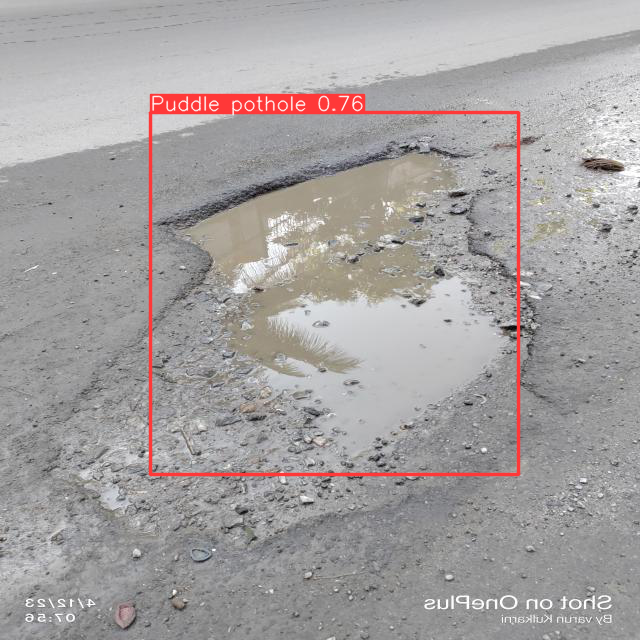

In [ ]:
import random
import os
import glob
import torch

# get a list of all image files in the test directory
img_files = glob.glob('/content/pothole finder.v1i.yolov5pytorch/test/images/IMG_20230412_075611_hflip_jpg.rf.656fb60dab9e4205a1856932ad5d100f.jpg')
# select a random image file
img_file = random.choice(img_files)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/pothole finder.v1i.yolov5pytorch/yolov5/runs/train/yolov5s_results/weights/best.pt')

# perform inference on the image file
results = model(img_file)

# show the image with bounding boxes
results.show()


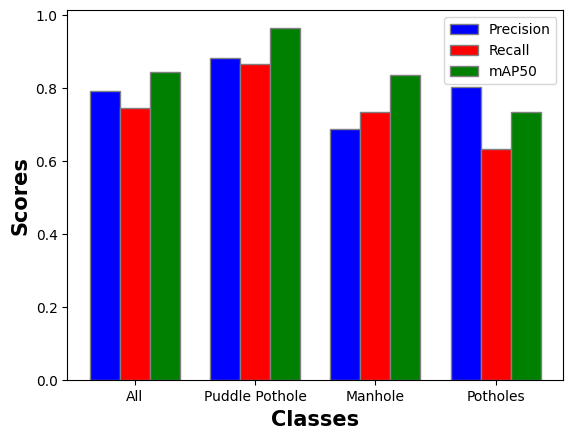

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Define the classes and their corresponding results
classes = ['All', 'Puddle Pothole', 'Manhole', 'Potholes']
precision = [0.791, 0.882, 0.688, 0.803]
recall = [0.744, 0.865, 0.735, 0.632]
mAP50 = [0.844, 0.965, 0.836, 0.733]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create precision bars
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')

# Create recall bars
plt.bar(r2, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')

# Create mAP50 bars
plt.bar(r3, mAP50, color='g', width=bar_width, edgecolor='grey', label='mAP50')

# Adding labels
plt.xlabel('Classes', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(classes))], classes)

# Create legend & Show graphic
plt.legend()
plt.show()
